# OBJECT-ORIENTED PROGRAMMING IN PYTHON 

The objective of this practice is to become familiar with the definition and use of classes in Python, with special emphasis on what we will need to implement a genetic algorithm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Q1**. Create a class "individual" corresponding to an individual of a genetic algorithm, with two attributes: "ngenes", the number of genes (int), and "genotype" (numpy array). Make it necessary to set the values of both arguments when creating a new instance of the class.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#Creating the individual class with two atributes
class Individual:
    def __init__(self, ngenes = None, genotype = None):
        self.ngenes = int(ngenes)
        self.genotype = np.array(genotype)

**Q2**. Create an instance of class "individual" with genotype "[0,0,0,1]". Print the corresponding genotype and check that everything is correct.

In [9]:
#create an object of type Individual
person1=Individual(4, [0,0,0,1])
print(person1.genotype)

[0 0 0 1]


**Q3**. Modify the above class as follows (name the new class "individual1"):
- add a "set_random_genotype" method to set a binary genotype randomly: with probability 0.5 assign a value of 1 or 0 to each gene.
- modify the initialization function so that the number of genes is 1 if no other value is specified, and the genotype is empty if not passed as an argument to initialization. In this case, make the genotype set randomly with the "set_random_genotype" function.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# create the individual class
class Individual1:
    def __init__(self, ngenes=1, genotype=None):
        self.ngenes = ngenes  # Add this line to define the attribute ngenes
        if genotype is None:
            self.genotype = np.zeros(self.ngenes)
            self.set_random_genotype()
        else:
            self.genotype = np.array(genotype)

    # we define a binary genotype randomly with pr:0.5
    def set_random_genotype(self):
        self.genotype = np.random.binomial(1, 0.5, size=self.ngenes)

ind = Individual1(ngenes=10)
print("The individual's genotype is:", ind.genotype)

The individual's genotype is: [0 1 1 0 1 0 0 1 0 0]


**Q4.** Check that it works correctly: create 1000 individuals with genotype of length 4 but without specifying their genotype, so that it is randomly defined. Make a graph showing the number of "1's" in the population at each position. Remember to set the random number generator seed before creating the objects.

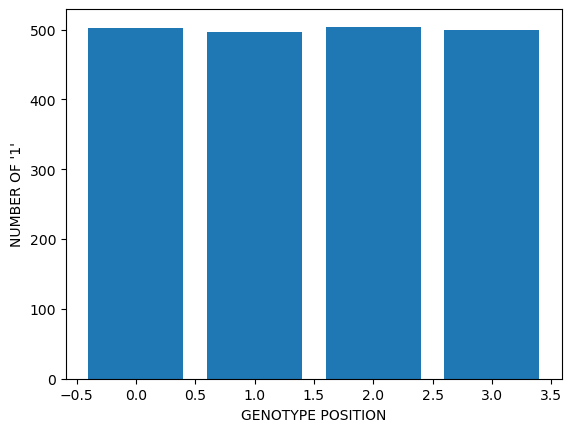

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#individual class
class Individual1:
    def __init__(self, ngenes=4, genotype=None):#number of genes=4
        self.ngenes = int(ngenes)
        if genotype is None:
            self.genotype = np.zeros(self.ngenes, dtype=int)
            self.set_random_genotype()
        else:
            self.genotype = np.array(genotype, dtype=int)

    def set_random_genotype(self):
        self.genotype = np.random.binomial(1, 0.5, size=self.ngenes)

# define the seed
np.random.seed(123)

# creating 1000 individuals
numind = 1000
pob = [Individual1(ngenes=4) for _ in range(numind)]

# We add the amount of "1" in the population at each position and add it to a vector to be able to graph it
ones = np.sum([ind.genotype for ind in pob], axis=0)

# Graphic
fig, a = plt.subplots()
a.bar(range(4), ones)
a.set_xlabel("GENOTYPE POSITION")
a.set_ylabel("NUMBER OF '1'")
plt.show()

**Q5**. Modify the previous class, naming the new class "individual2", in which the genotype takes continuous values. Make it possible to specify bounds on the values ​​of each gene in the initialization function. For example, you can add as arguments two lists, *boundslow* and *boundshigh* , containing the lower and upper bounds of each gene, respectively. Make it possible to randomly generate a genotype by choosing values ​​within these ranges.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#we create the class individual2 with the upper and lower bounds
class Individual2:
    def __init__(self, ngenes=10, limabajo=None, limarriba=None, genotype=None):
        self.ngenes = int(ngenes)
        if limabajo is None:
            limabajo = [0]*self.ngenes
        if limarriba is None:
            limarriba = [1]*self.ngenes
        self.limabajo = np.array(limabajo)
        self.limarriba = np.array(limarriba)
        if genotype is None:
            self.genotype = np.zeros(self.ngenes)
            self.set_random_genotype()
        else:
            self.genotype = np.array(genotype)
           
    #function that allows to generate a random genotype with continuous values
    def set_random_genotype(self):
        if self.limabajo is None or self.limarriba is None:
            raise ValueError("Unspecified limits")
        self.genotype = np.random.uniform(self.limabajo, self.limarriba, size=self.ngenes)
    
    #function to print the results   
    def print_bounds(self):
        for i in range(self.ngenes):
            print("The genotype ", i+1, "has the following boundaries:", self.limabajo[i], self.limarriba[i])

#we check the code with 4 genes and limits specified by us
ind = Individual2(ngenes=4, limabajo=[0, 0.5, -5, 10], limarriba=[1, 0, 5, 20])
ind.print_bounds()   

The genotype  1 has the following boundaries: 0.0 1
The genotype  2 has the following boundaries: 0.5 0
The genotype  3 has the following boundaries: -5.0 5
The genotype  4 has the following boundaries: 10.0 20


**Q6.** Check that the genotype random generation function works correctly: create 10000 individuals of class "individual2" with genotype of length 4. The first gene can take values ​​between [0,1], the others between [ -5.5]. For each position, make a histogram of the distribution of values ​​in the population. Remember to set the random number generator seed before creating the objects.

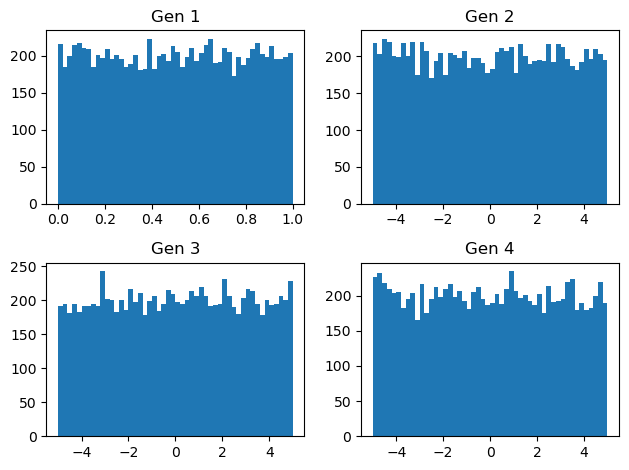

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# create the class individual2 with the upper and lower bounds
class Individual2:
    def __init__(self, ngenes=10, limabajo=None, limarriba=None, genotype=None):
        self.ngenes = int(ngenes)
        if limabajo is None:
            limabajo = [0]*self.ngenes
        if limarriba is None:
            limarriba = [1]*self.ngenes
        self.limabajo = np.array(limabajo)
        self.limarriba = np.array(limarriba)
        if genotype is None:
            self.genotype = np.zeros(self.ngenes)
            self.set_random_genotype()
        else:
            self.genotype = np.array(genotype)
           
    #function that generates a random genotype with continuous values
    def set_random_genotype(self):
        if self.limabajo is None or self.limarriba is None:
            raise ValueError("Unspecified limits")
        self.genotype = np.random.uniform(self.limabajo, self.limarriba, size=self.ngenes)
    
   #function to print the results
    def print_bounds(self):
        for i in range(self.ngenes):
            print("The genotype ", i+1, "has the following boundaries:", self.limabajo[i], self.limarriba[i])


np.random.seed(10)



# We generate the 10000 individuals
numind = 10000
pob = [Individual2(ngenes=4, limabajo=[0, -5, -5, -5], limarriba=[1, 5, 5, 5])for _ in range(numind)]

gene_values = np.array([ind.genotype for ind in pob])


fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i in range(4):
    axes[i].hist(gene_values[:, i], bins=50)
    axes[i].set_title(f'Genotype {i+1}')

fig.tight_layout()
plt.show()
